In [72]:
import matplotlib.pyplot as pyplot 
import numpy as np 
import numpy.random as random 
import scipy.optimize as optimize 
import scipy.integrate as integrate 
from sympy.solvers import solve
from sympy import symbols

Death rate associated with the disease. Calcualted by taking the total deaths for Liberia and dividing by the total population.

In [73]:
4810/4359505

0.001103336273269557

<h1>Basic SEIRF Model</h1> </n>
    The initial population is 4.3 million.
    </n> For this model, we take into account the natural birth and death rates for Liberia.
    We need the paramaters, from an academic paper.

Birth and death rates: https://www.macrotrends.net/countries/LBR/liberia/death-rate </n> Incubation Period https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease

Population: https://data.worldbank.org/country/LR

3020554.6881418373


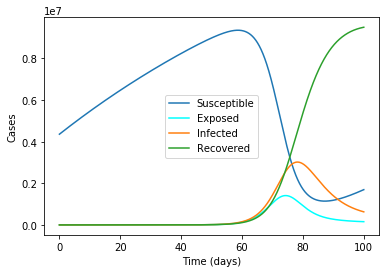

In [81]:
N=4359505    #population of Liberia
mu_b=0.035117 #birth rate Liberia-2014
mu= 0.008725  #death rate Liberia-2014         
alpha=1/2 #reciprocal of incubation period      #inclubation period is 2 to 21 days WHO
gamma=1/5.61 #reciprocal of infectious period   #noted in paper by C. Althaus 
R0=1.59      #number of individuals one person can infect #from C. Althaus Estimating the Reproduction Number of Eb
            #This number is specific to Liberia 
di=0.001103336273269557
beta=(R0*(mu+alpha)*(mu+gamma))/alpha


def SEIR_system(T,t):
    S,E,I,R=T
    
    system = np.array([mu_b*N-mu*S-(beta*S*I)/N,
                      (beta*S*I)/N-(mu+alpha)*E,
                      alpha*E-(mu+gamma+di)*I,
                      gamma*I-mu*R])
    return(system)
t=np.arange(0,100,0.01)
result=integrate.odeint(SEIR_system,[N*(1-0.00000186),N*0.00000186,0,0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1],color='aqua')
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Exposed","Infected","Recovered"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases")
pyplot.savefig("SEIR_Plot2014.png",dpi=1000)
pyplot.savefig("SEIR.eps",dpi=1000)
tt2= np.max(R_sol)
print(tt2)

<H5> 2020 Model </H5>

0.29976444463640517
3440690.2106784373


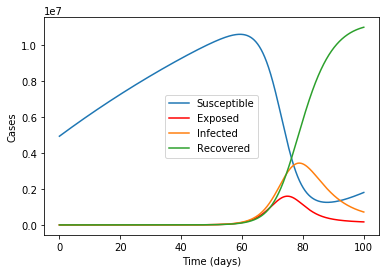

In [80]:
Nn=4937374    
mu_b=0.032899 
mu= 0.007494          
alpha=1/2 
gamma=1/5.61  
R0=1.59     #number of people one person infects
di=0.001103336273269557
beta=(R0*(mu+alpha)*(mu+gamma))/alpha
print(beta)
def SEIR_system(T,t):
    S,E,I,R=T
    
    system = np.array([mu_b*Nn-mu*S-(beta*S*I)/Nn,
                      (beta*S*I)/Nn-(mu+alpha)*E,
                      alpha*E-(mu+gamma+di)*I,
                      gamma*I-mu*R])
    return(system)
t=np.arange(0,100,0.01)
result=integrate.odeint(SEIR_system,[Nn*(1-0.00000186),Nn*0.00000186,0,0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1],color='red')
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Exposed","Infected","Recovered"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases")
pyplot.savefig("SEIR_Plot2020.png",dpi=1000)
pyplot.savefig("SEIR.eps",dpi=1000)
tt1= np.max(R_sol)
print(tt1)

Death Rate for EVD included

N=4300000    #population of Liberia
mu_b=0.035117 #birth rate Liberia-2014
mu= 0.008725  #death rate Liberia-2014         
alpha=1/2 #reciprocal of incubation period      #inclubation period is 2 to 21 days WHO
gamma=1/5.61 #reciprocal of infectious period   #noted in paper by C. Althaus 
R0=1.59      #number of individuals one person can infect #from C. Althaus Estimating the Reproduction Number of Eb
            #This number is specific to Liberia 
dr=.25
betaR=(R0*(mu+alpha)*(mu+gamma))/alpha


def SEIR_system(T,t):
    S,E,I,R,D=T
    
    system = np.array([mu_b*N-mu*S-(betaR*S*I)/N,
                      (betaR*S*I)/N-(mu+alpha)*E,
                      alpha*E-(mu+gamma)*I-dr*I,
                      gamma*I-mu*R,
                      dr*I])
    return(system)
t=np.arange(0,1000,0.01)
resultR=integrate.odeint(SEIR_system,[N*(1-0.00000186),N*0.00000186,0,0,0],t)

S_solR = resultR[:,0]
I_solR = resultR[:,1]
R_solR = resultR[:,2]
F_solR = resultR[:,3]
D_solR = resultR[:,4]
    
pyplot.plot(t,resultR[:,0])
pyplot.plot(t,resultR[:,1])
pyplot.plot(t,resultR[:,2])
pyplot.plot(t,resultR[:,3])
pyplot.plot(t,resultR[:,4])
pyplot.legend(["Susceptible","Exposed","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases")
pyplot.savefig("SEIRD_Plot.png",dpi=1000)

In [30]:
beta

0.30248301130568184

<h2>Long Term Behavior</h2>

Text(0, 0.5, 'Cases')

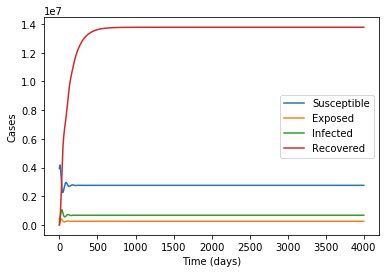

In [31]:
t=np.arange(0,4000,0.01)
result=integrate.odeint(SEIR_system,[0.9*N,0.1*N,0,0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Exposed","Infected","Recovered"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases")

Disease Free Equilibirum and Endemic Equilbirum

In [32]:
S_tail=result[-5:-1,0]
I_tail=result[-5:-1,1]
R_tail=result[-5:-1,2]
D_tail=result[-5:-1,3]

print(S_tail)
print(I_tail)
print(R_tail)
print(D_tail)

[2758006.24853448 2758006.24853448 2758006.24853448 2758006.24853448]
[253632.38010057 253632.38010057 253632.38010057 253632.38010057]
[674262.06148985 674262.06148985 674262.06148985 674262.06148985]
[13775279.74482881 13775279.74482881 13775279.74482881 13775279.74482881]


In [33]:
def Jacobian(T,t):
    S,E,I,R=T
    t=np.arange(0,1000,0.01)
    Jac_general=([[-mu-(beta*I)/N,0,-(beta*S)/N,0],
                  [(beta*I)/N,-(mu+alpha),(beta*S)/N,0],
                  [0,alpha,-(gamma+mu+di),0],
                  [0,0,gamma,-mu]])
    return(Jac_general)

Disease Free Equilibrim

In [34]:
T=(N,0,0,0)
Jac_eqlb_1=Jacobian(T,0)
print(Jac_eqlb_1)

np.linalg.eig(Jac_eqlb_1)[0]

[[-0.008725, 0, -0.30248301130568184, 0], [0.0, -0.508725, 0.30248301130568184, 0], [0, 0.5, -0.18808145570285958, 0], [0, 0, 0.17825311942959002, -0.008725]]


array([-0.008725  , -0.008725  ,  0.07224458, -0.76905103])

Based on these 4 eigenvalues, the disease free equilibirum point is unstable, since it does NOT have all negative eigenvalues. [-0.008725  , -0.008725  ,  0.07300681, -0.76870993] Impossible to get back to normal once one person has the disease. 

<b>Endemic Equilibrium</b>

In [46]:
T=(3188557.9676314965,
  2223350.5420910814,
  566236.4968727757,
  11568300.504579432)
#2704402.515723271, 250444.12610018082, 669715.0630892136, 13682383.85382659
Jac_eqlb_2=Jacobian(T,0)
print(Jac_eqlb_2)

np.linalg.eig(Jac_eqlb_2)[0]

[[-0.04801315787234044, 0, -0.22123718536207662, 0], [0.03928815787234044, -0.05634404761904761, 0.22123718536207662, 0], [0, 0.047619047619047616, -0.18808145570285958, 0], [0, 0, 0.17825311942959002, -0.008725]]


array([-0.008725  +0.j       , -0.25221554+0.j       ,
       -0.02011156+0.0353332j, -0.02011156-0.0353332j])

Stable oscilating toward equilibrium point. 3 D graph with SIR on each axis will sprial into equilib pt.  Complex eigenvalues produces the osccilation. Negative means toward positive means away from equilb pt. 

<H3>Symbolic Solver</H3>

In [35]:
N, delta, mu, alpha, gamma, beta, sigma=symbols("N delta mu alpha gamma beta sigma")
S, E, I, R =symbols('S E I R')  #here sigma represents di

In [36]:
SEIR_system=np.array([delta*N-mu*S-(beta*S*I)/N,
                      (beta*S*I)/N-(mu+alpha)*E,
                      alpha*E-(mu+gamma+sigma)*I,
                      gamma*I-mu*R])
solve(SEIR_system, S, E, I, R)

[(N*delta/mu, 0, 0, 0),
 (N*(alpha + mu)*(gamma + mu + sigma)/(alpha*beta),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - alpha*mu*sigma - gamma*mu**2 - mu**3 - mu**2*sigma)/(alpha*beta*(alpha + mu)),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - alpha*mu*sigma - gamma*mu**2 - mu**3 - mu**2*sigma)/(beta*(alpha + mu)*(gamma + mu + sigma)),
  N*gamma*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - alpha*mu*sigma - gamma*mu**2 - mu**3 - mu**2*sigma)/(beta*mu*(alpha + mu)*(gamma + mu + sigma)))]

This is the general form of the equilibrium points

N=4359505    #population of Liberia
delta or mu_b=0.035117 #birth rate Liberia-2014
mu= 0.008725  #death rate Liberia-2014         
alpha=1/2 #reciprocal of incubation period      #inclubation period is 2 to 21 days WHO
gamma=1/5.61 #reciprocal of infectious period   #noted in paper by C. Althaus 
R0=1.59      #number of individuals one person can infect #from C. Althaus Estimating the Reproduction Number of Eb
            #This number is specific to Liberia 
di=0.001103336273269557
beta=(R0*(mu+alpha)*(mu+gamma))/alpha

#N pop #deltaBR #muDR #alphaincu

def SEIR_system(T,t):
    S,E,I,R=T
    
mu_b*N-mu*S-(beta*S*I)/N,
(beta*S*I)/N-(mu+alpha)*E,
 alpha*E-(mu+gamma+di)*I,
 gamma*I-mu*R])

In [43]:
1*0.001103336273269557

0.001103336273269557

In [63]:
N,delta,mu,alpha,gamma,beta,sigma=(4359505,0.035117,0.008725,1/2,1/5.61,2*0.30248301130568184,1*0.001103336273269557) 
[(N*(alpha + mu)*(gamma + mu)/(alpha*beta),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(alpha*beta*(alpha + mu)),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(beta*(alpha + mu)*(gamma + mu)),
  N*gamma*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(beta*mu*(alpha + mu)*(gamma + mu)))]
#[(N*delta/mu, 0, 0, 0)]

[(1370913.5220125788,
  277422.01897968503,
  741856.9077120097,
  15156253.06247051)]

In [66]:
N,delta,mu,alpha,gamma,beta,sigma=(4937374,0.032899,0.007494,1/21,1/5.61,0.29976444463640517,0.001103336273269557) 
[(N*(alpha + mu)*(gamma + mu)/(alpha*beta),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(alpha*beta*(alpha + mu)),
  N*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(beta*(alpha + mu)*(gamma + mu)),
  N*gamma*(alpha*beta*delta - alpha*gamma*mu - alpha*mu**2 - gamma*mu**2 - mu**3)/(beta*mu*(alpha + mu)*(gamma + mu)))]
#[(N*delta/mu, 0, 0, 0)]

[(3540884.131700736, 2465827.73796865, 632151.7600664995, 15036432.237090908)]

In [53]:
N=4937374    
mu_b=0.032899 
mu= 0.007494          
alpha=1/2 
gamma=1/5.61  
R0=1.59     #number of people one person infects
di=0.001103336273269557
beta=(R0*(mu+alpha)*(mu+gamma))/alpha
print(beta)

0.29976444463640517


<h1>Basic SIRF Model</h1> </n>
    The initial population is 4.3 million.
    </n> For this model, we assume that the natural birth rate is the same as the natural death rate.
    We need the paramaters, from an academic paper.

https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease </n>

According to the WHO, the average case fatality rate is around 50%. 
Case fatality rates have varied from 25% to 90% in past outbreaks.

Text(0, 0.5, 'Cases')

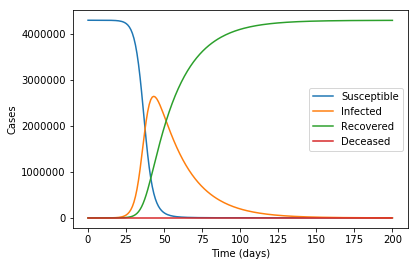

In [27]:
beta=.4   #rate of infection
beta_f=0.3  #rate of infection at funerals 
gamma = 0.05 #rate of recovery
sigma=0.05  #rate of death

N=4300000


def SIRF_system(T,t):   
    S,I,R,F = T
       
    system=np.array([-beta*S*I/N-beta_f*S*F/N,
                         beta*S*I/N+beta_f*S*F/N-gamma*I,
                         gamma*I-sigma*F,
                         sigma*F])
    return (system)

t=np.linspace(0,200,200)

#result = integrate.odeint(SIRF_system, [N*0.995,N*0.005,N*0,N*0],t)
result = integrate.odeint(SIRF_system, [N*(1-(10/N)),N*(10/N),N*0,N*0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases")

<h1>Basic SIRD Model</h1> </n>
    The initial population is 4.3 million.
    </n> For this model, we assume that the natural birth rate is the same as the natural death rate.
    We need the paramaters, from an academic paper.

<b>Mathematical Modelling of the Transmission Dynamics of
Ebola Virus</b> </n>

According to the Osemwinyen and Diakhaby the rate of infection (alpha) was 3.15x10**-5, the rate of recovery was 0.27, the rate of susceptibility (gamma) was 0.23 and the rate of death (delta) was  0.73. 

Text(0, 0.5, 'Cases')

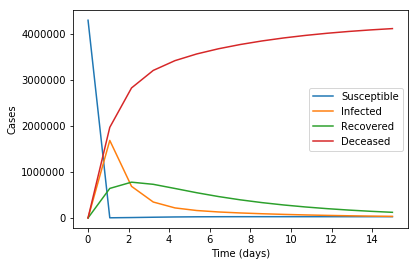

In [26]:
alpha=3.15*1e-5   #transmission rate
beta=0.27  #recovery rate
gamma = 0.23 #rate of susceptibility
delta=0.73  #rate of death

N=4300000

def SIRD_system(T,t):
    S,I,R,D=T
    system=np.array([-alpha*S*I+gamma*R, alpha*S*I-beta*I-delta*I, beta*I-gamma*R,delta*I])
    return(system)
#make sure to divide by N
#follow wikipedia model
#thanks!
#https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
#SIRD model

t=np.linspace(0,15,15)

result = integrate.odeint(SIRD_system, [N-8,8,N*0,N*0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases") 


Another Model: </n>The SIRD model used was obtained from https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology.

The following data was used to verify the model works, when it was run for 100 days: 

N=1000
beta=0.4
gamma=0.035
mu=0.005
result = integrate.odeint(SIRD_system, [N-3,3,N*0,N*0],t)

Text(0, 0.5, 'Cases')

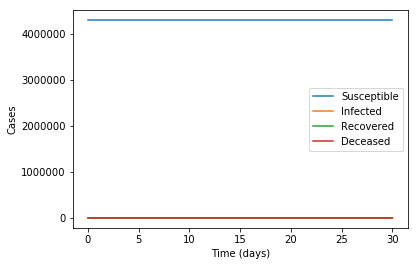

In [23]:
beta=3.15*1e-5  #infection rate
gamma = 0.27 #recovery rate
mu=0.73  #mortality rate

N=4300000

def SIRD_system(T,t):
    S,I,R,D=T
    system=np.array([-(beta*I*S)/N,(beta*I*S)/N-gamma*I-mu*I,gamma*I,mu*I])
    return(system)

t=np.linspace(0,30,30)

result = integrate.odeint(SIRD_system, [N-8,8,N*0,N*0],t)


S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases") 


The SIRD model used was obtained from Althaus (2014)

In [ ]:
beta=3.15*1e-5  #infection rate
gamma = 0.27 #recovery rate
mu=0.73  #mortality rate

N=4300000       #need to change system and paramaters

def SIRD_system(T,t):
    S,I,R,D=T
    system=np.array([-(beta*I*S)/N,(beta*I*S)/N-gamma*I-mu*I,gamma*I,mu*I])
    return(system)


t=np.linspace(0,30,30)

result = integrate.odeint(SIRD_system, [N-8,8,N*0,N*0],t)


S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases") 


We can find the equilibirum by running the model for a long time

Text(0, 0.5, 'Cases')

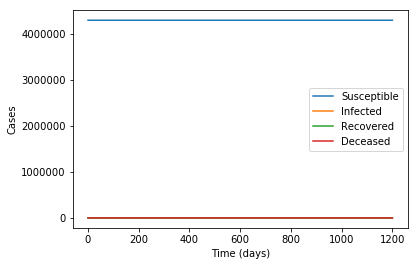

In [14]:
t=np.linspace(0,1200,1200)

result = integrate.odeint(SIRD_system, [N-8,8,N*0,N*0],t)

S_sol = result[:,0]
I_sol = result[:,1]
R_sol = result[:,2]
F_sol = result[:,3]
    
pyplot.plot(t,result[:,0])
pyplot.plot(t,result[:,1])
pyplot.plot(t,result[:,2])
pyplot.plot(t,result[:,3])
pyplot.legend(["Susceptible","Infected","Recovered","Deceased"])
pyplot.xlabel("Time (days)")
pyplot.ylabel("Cases") 

Therefore we can see that without intervention such as vaccination or quarantine, the only equilibrium value is when susceptible is near 26000 and infected and recovered categories reach near 0, and almost the entire population dies, due to the highly fatal effects of contracting EVD. This model reaches equilibrium around day 25.

In [15]:
S_tail=result[-10:-1,0]
I_tail=result[-10:-1,1]
R_tail=result[-10:-1,2]
D_tail=result[-10:-1,3]

In [16]:
print(S_tail)
print(I_tail)
print(R_tail)
print(D_tail)

[4299991.99974799 4299991.99974799 4299991.99974799 4299991.99974799
 4299991.99974799 4299991.99974799 4299991.99974799 4299991.99974799
 4299991.99974799]
[-6.45748884e-19 -6.45482064e-19 -6.45215245e-19 -6.44948425e-19
 -6.44681606e-19 -6.44414787e-19 -6.44147967e-19 -6.43881148e-19
 -6.43614329e-19]
[2.16006804 2.16006804 2.16006804 2.16006804 2.16006804 2.16006804
 2.16006804 2.16006804 2.16006804]
[5.84018397 5.84018397 5.84018397 5.84018397 5.84018397 5.84018397
 5.84018397 5.84018397 5.84018397]


In [56]:
26781.33469558,4273218.66530441

(26781.33469558, 4273218.66530441)

As well, there is a disease free equilibrium point at N,0,0,0, since when no one has the disease, no one can transmit it, and for simplicity we assumed that the birth rate was equal to the death rate.
#ok, makes sense***note need to add BR/DR dynamics to model to talk about disease free equilib*** follow Lab 7

In [ ]:
#[-alpha*S*I+gamma*R alpha*S*I-beta*I-delta*I     , beta*I-gamma*R       ,delta*I]

In [60]:
def Jacobian(T,t):
    S,I,R,D=T
    t=np.arange(0,1000,0.01)
    Jac_general=np.array([[-alpha*I,alpha*I,0,0],
                          [-alpha*S,alpha*S-beta-delta,beta,delta],
                          [gamma,0,-gamma,0],
                          [0,0,0,0]])
    return(Jac_general)

Find the stability of the disease free equilbrium point

In [61]:
T=(N,0,0,0)
Jac_eq_1=Jacobian(T,0)
print(Jac_eq_1)

np.linalg.eig(Jac_eq_1)[0]

[[  -0.      0.      0.      0.  ]
 [-135.45  134.45    0.27    0.73]
 [   0.23    0.     -0.23    0.  ]
 [   0.      0.      0.      0.  ]]


array([134.45,  -0.23,  -0.  ,   0.  ])

This is the Jacobean, and these are the 4 eigenvalues. Based on these eigenvalues we can say that the disease free equilibrium point is unstable, since not all of the eigenvalues are negative. This makes sense, because as soon as one infected is placed into the population then the model will take off (infection will rise and such). There is no going back, and the only solution is treatment, vaccination, quarantine, or some other health policy measure. Unstable from a biological standpoint. (There is no disease free equilibrium for which solutions can converge to that point (e.g. you will never get back to this point without public health measures)).

<b> Endemic Equilibirum </b>

In [62]:
T=(26781.33469558,-1.30593269e-14,-4.78991522e-14,4273218.66530442)
Jac_eq_2=Jacobian(T,0)
print(Jac_eq_2)

np.linalg.eig(Jac_eq_2)[0]

[[ 4.11368797e-19 -4.11368797e-19  0.00000000e+00  0.00000000e+00]
 [-8.43612043e-01 -1.56387957e-01  2.70000000e-01  7.30000000e-01]
 [ 2.30000000e-01  0.00000000e+00 -2.30000000e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


array([ 0.        , -0.23      , -0.15638796,  0.        ])

In [ ]:
#inconclusive due to model
#note:change model to wiki model and point should be stable
#double check Jac is correct
